In [4]:
from plot_days_info import plot_mass
from create_days_df import create_days_df_from_dj
import dj_utils as dju
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

from pathlib import Path
import pandas as pd
import numpy as np


In [13]:
# ANIMALS
ANIMAL_IDS = ["R512", "R513"]
n_animals = len(ANIMAL_IDS)

# DATES
date_min, date_max = dju.return_date_window(latest_date=None, n_days_back=20)

In [14]:
days_df = create_days_df_from_dj(
    ANIMAL_IDS, date_min=date_min, date_max=date_max, verbose=False
)

[2023-07-28 13:52:04,255][WARNING]: MySQL server has gone away. Reconnecting to the server.


KeyboardInterrupt: 

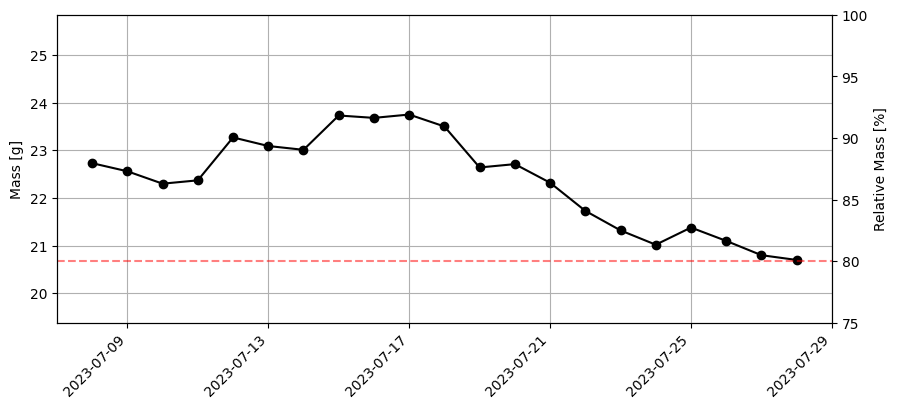

In [12]:
fig, ax = plt.subplots(n_animals, 1, figsize=(10, 4 * n_animals))

if n_animals == 1:
    plot_mass(days_df, ax, title=ANIMAL_IDS[0])
else:
    for ii, id in enumerate(ANIMAL_IDS):
        animal_df = days_df.query("animal_id == @id")
        plot_mass(animal_df, ax[ii], title=id)